---
# Propositional logic tautologies
---

# $\vdash p \vee q \rightarrow \neg p \rightarrow q$ 

$$ 
\begin{array}{cccll}
\mathrm{\bf Propositions} & &\mathrm{\bf Types} && \\
\hline
p &\;\; &\mathtt{P} && \mathrm{type\;variable} \\
p \vee q && \mathtt{Either[P, Q]} && \mathrm{sum\;type}\\
p \wedge q && \mathtt{(P, Q)} && \mathrm{product\; type} \\
p \rightarrow q && \mathtt{P => Q} &&\mathrm{exponent\; type} \\
\bot && \mathtt{Nothing} && \mathrm{0} \\
\neg p \equiv p \rightarrow \bot && \mathtt{Not[P] \equiv P => Nothing}
\end{array}
$$




In [ ]:
type Not[P] = P => Nothing

In [ ]:
def proof[P, Q]: Either[P, Q] => Not[P] => Q = 
    ???

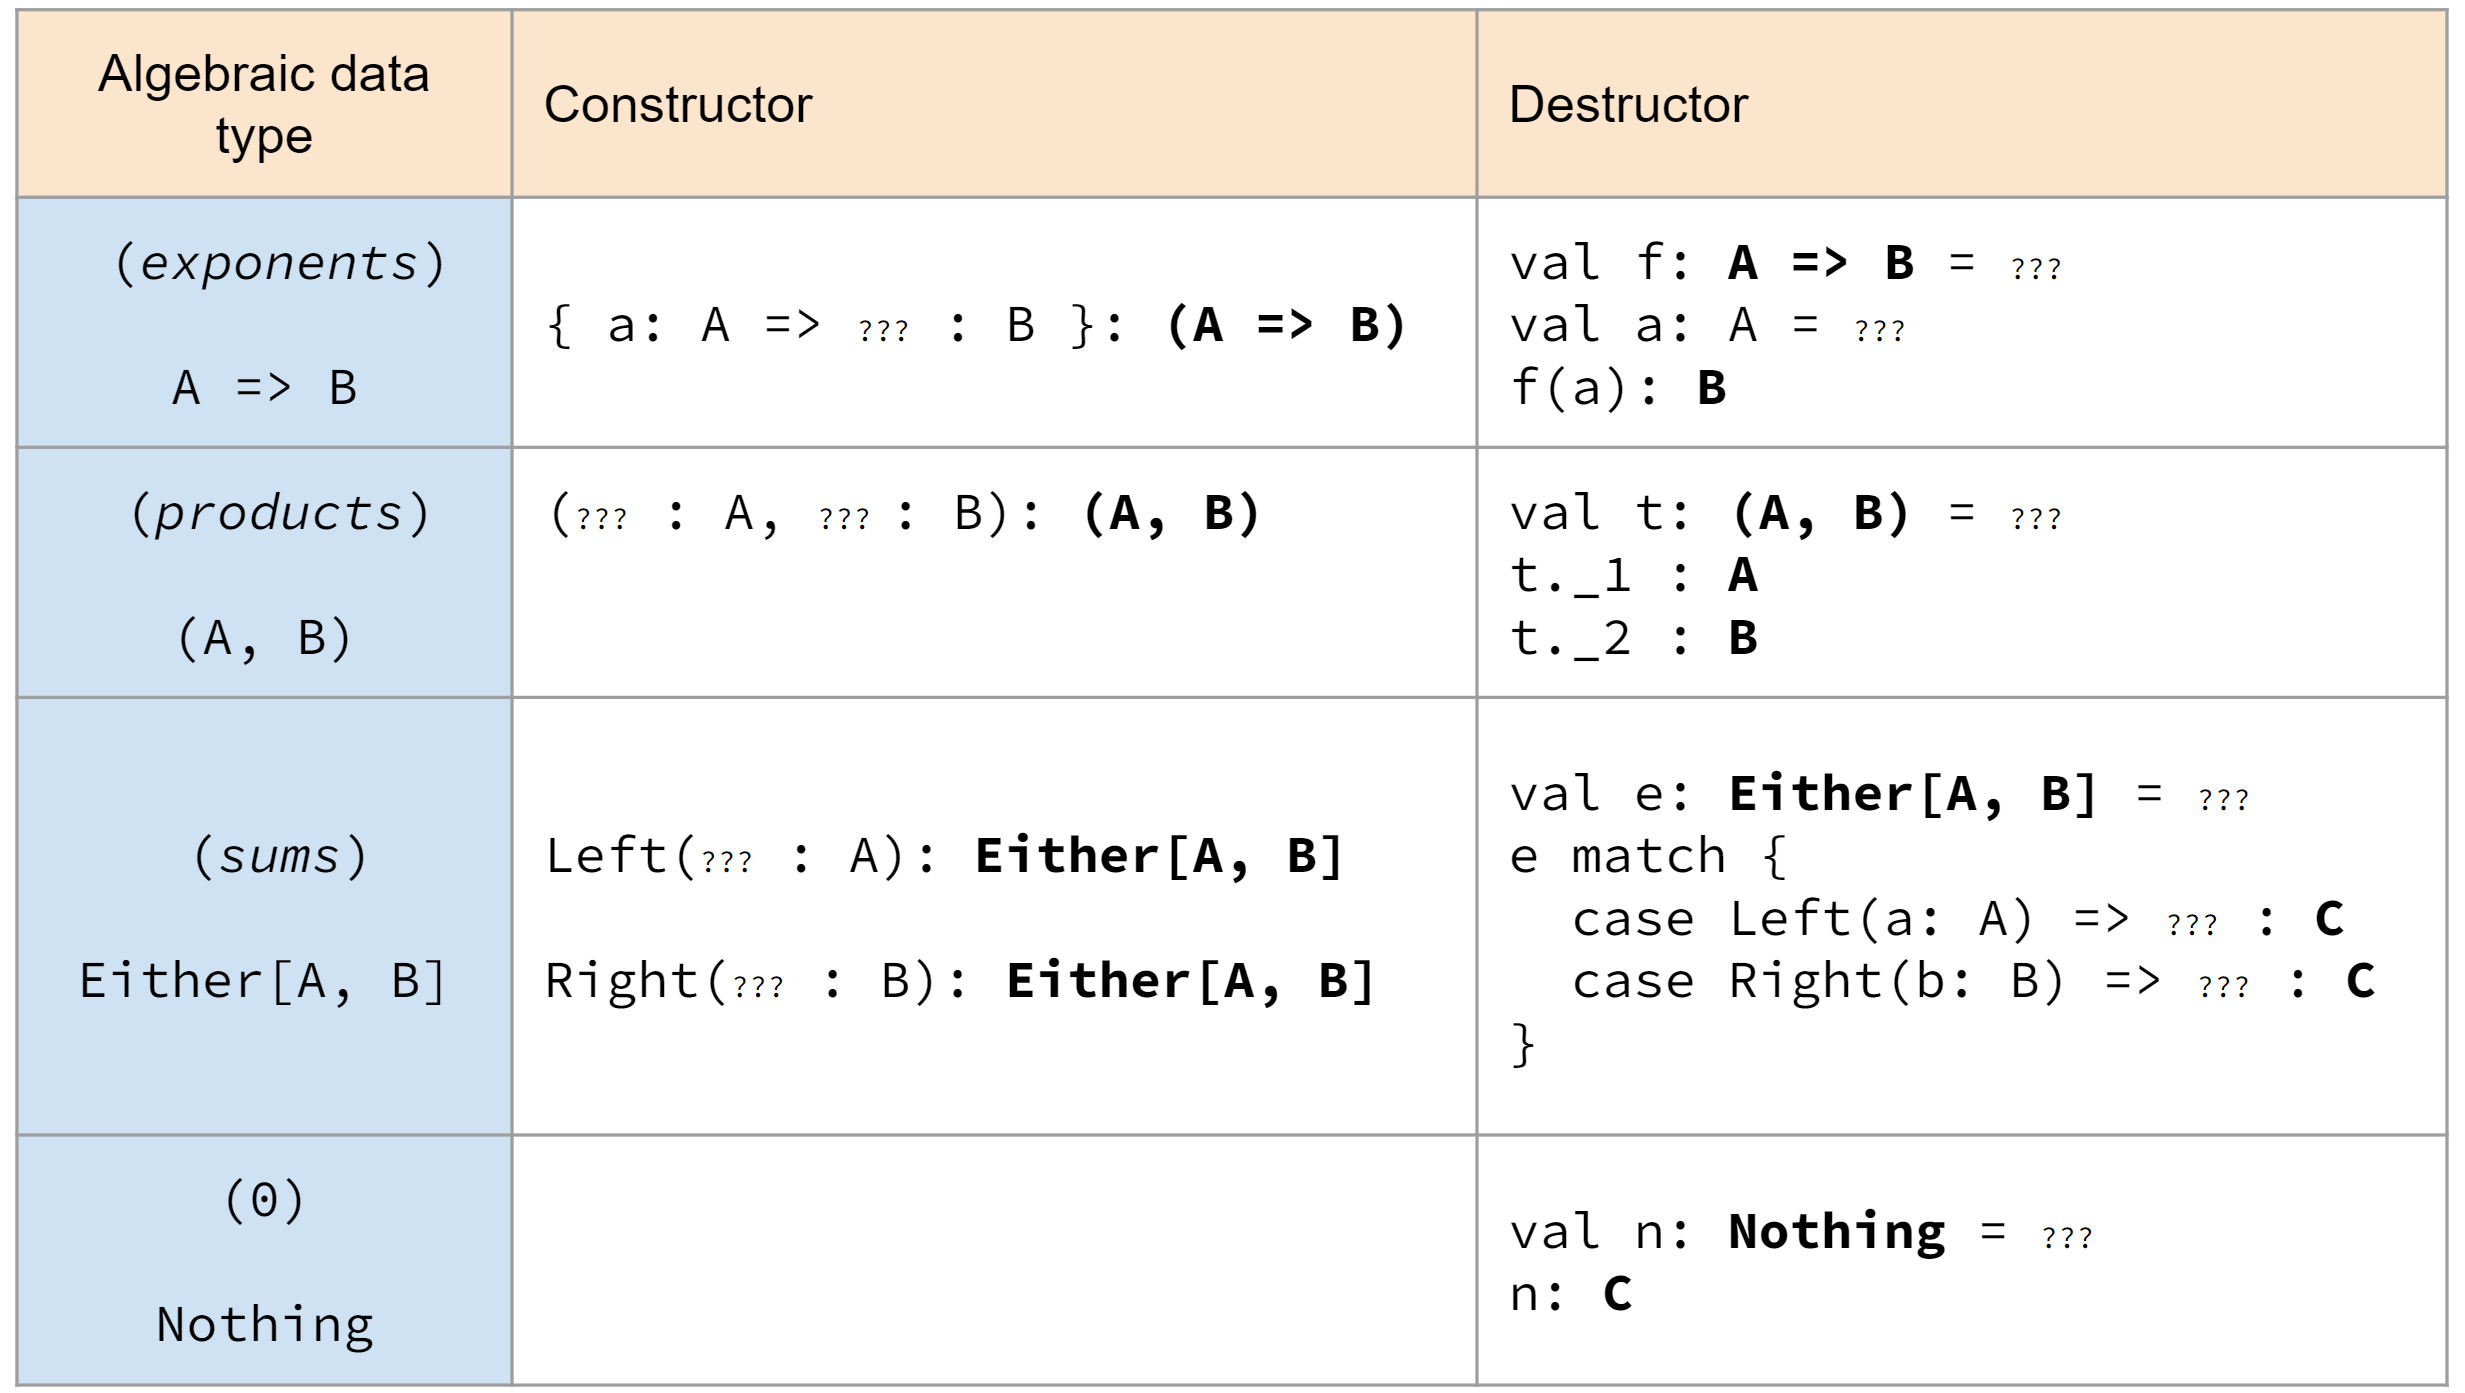

In [ ]:
def proof[P, Q]: Either[P, Q] => (Not[P] => Q) = 
    (e: Either[P, Q]) => 
        (np: P => Nothing) => 
            e match {
                case Right(q: Q) => q : Q
                case Left(p: P) => np(p) : Q
            }

# $\nvdash \neg (p \wedge q) \rightarrow  (\neg p \vee \neg q)$ 

In [ ]:
def proof[P, Q]: Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    (npq: Not[(P, Q)]) => 
        //Left((p: P) => npq((p : P, ??? : Q)) : Nothing) : Either[Not[P], Not[Q]]
        Right((q: Q) => npq((??? : P, q : Q)) : Nothing) : Either[Not[P], Not[Q]]

# $ \{q \vee \neg q\} \vdash \neg (p \wedge q) \rightarrow  (\neg p \vee \neg q)$ 

In [ ]:
def proof[P, Q](lemq: Either[Q, Not[Q]]): Not[(P, Q)] => Either[Not[P], Not[Q]] = 
    lemq match {
        case Left(q: Q) => 
            (npq: Not[(P, Q)]) => 
                Left((p: P) => npq((p : P, q : Q)) : Nothing) : Either[Not[P], Not[Q]]
        case Right(nq: Not[Q]) => 
            (_: Not[(P, Q)]) => 
                Right((q: Q) => nq(q) : Nothing) : Either[Not[P], Not[Q]]
    }

---
# Aristotle's syllogisms
---

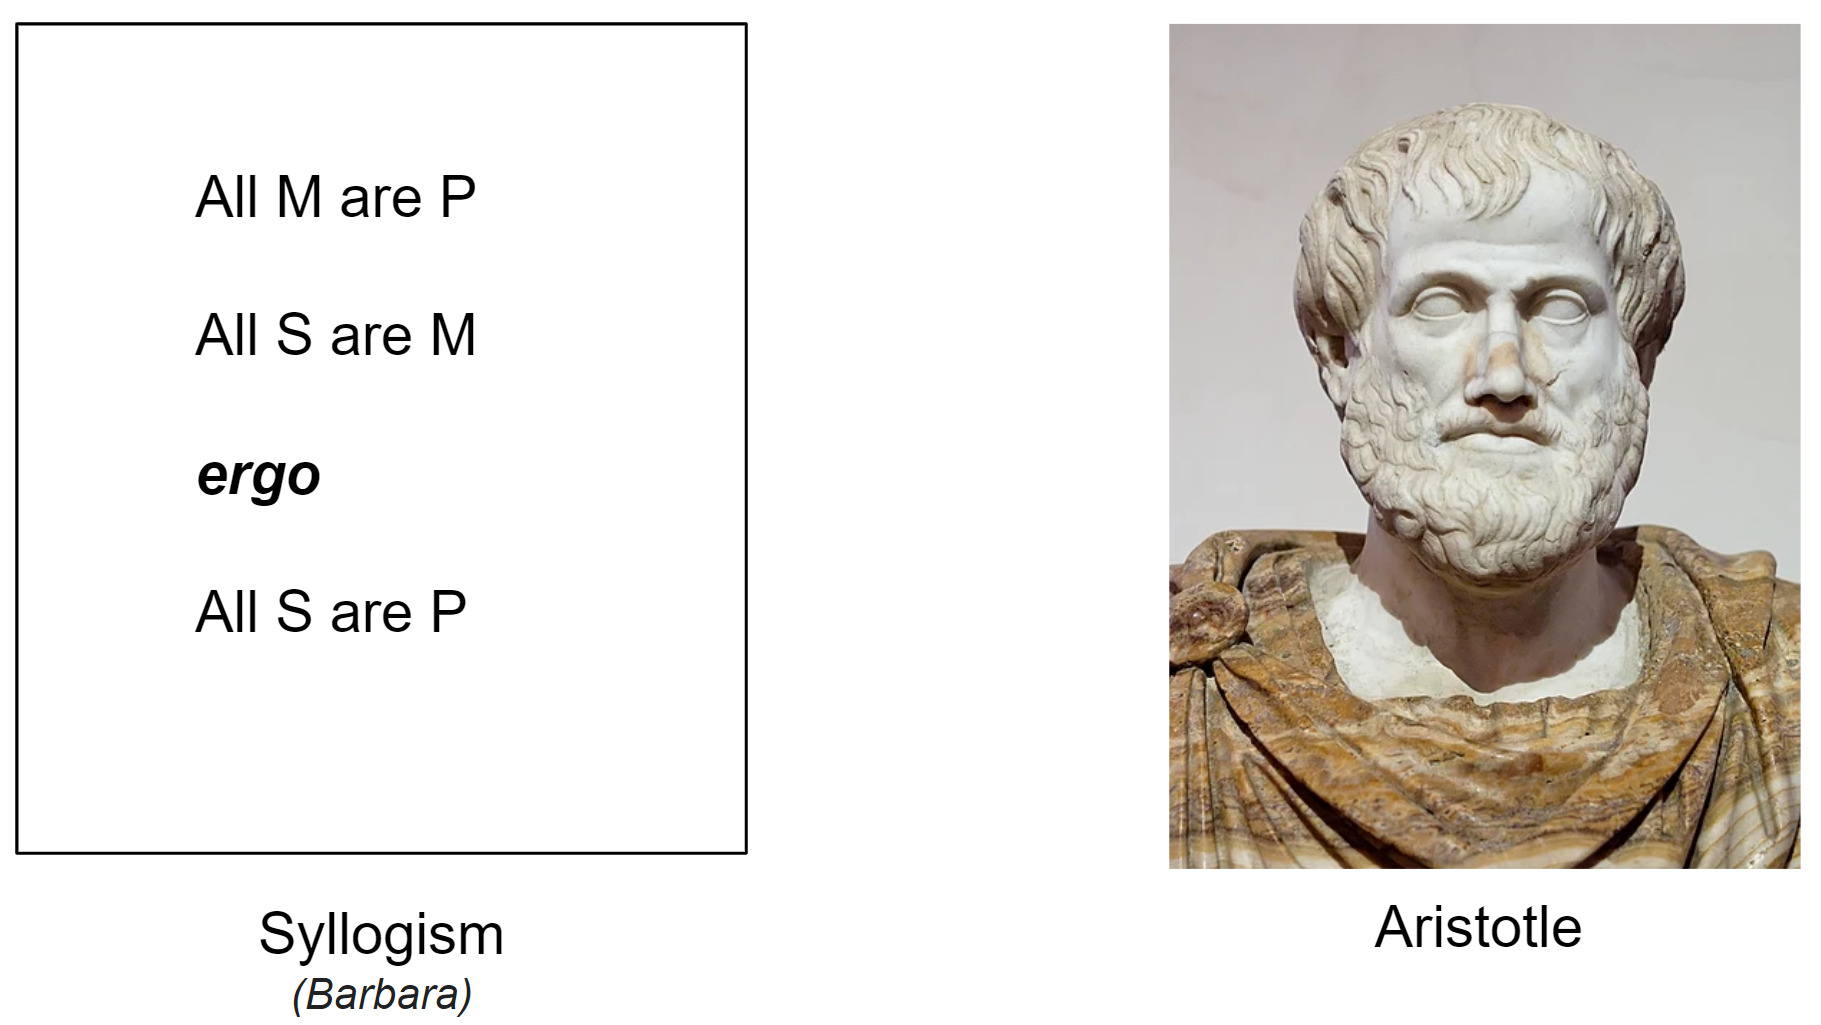

__Major premise:__ $\forall x. M(x) \rightarrow P(x)$

__Minor premise:__ $\forall x. S(x) \rightarrow M(x)$

__Conclusion:__ $\forall x. S(x) \rightarrow P(x)$


$$ 
\begin{array}{clcll}
\mathrm{\bf First-order\; logic} & & \mathrm{\bf Scala\; features} & & \\
\hline
x & & \mathtt{x} & & \mathrm{objects}\\
p & & \mathtt{\{type \;P\}} & & \mathrm{member\; type} \\
&&&&\\
\mathrm{\bf Propositions} & & \mathrm{\bf Types} & & \\
\hline
p(x) &\;\;& \mathtt{x.P} && \mathrm{path-dependent\; types} \\
\forall x. p(x) && \mathtt{(x: \{type\; P\}) => x.P} & & \mathrm{dependent-function\; types} \\
\end{array}
$$




In [ ]:
trait Entity:
    type S
    type M
    type P

In [ ]:
def barbara(
        major: (x: Entity) => x.M => x.P, 
        minor: (x: Entity) => x.S => x.M): 
               (x: Entity) => x.S => x.P = 
    (x: Entity) => (xS: x.S) => major(x)(minor(x)(xS : x.S) : x.M) : x.P

In [ ]:
def barbara(
        major: (x: Entity) => x.M => x.P, 
        minor: (x: Entity) => x.S => x.M): 
               (x: Entity) => x.S => x.P = 
    (x: Entity) => major(x) compose minor(x)

<img src="images/bocardo.png" alt="drawing" width="300"/>

__Major premise:__ $\exists x. M(x) \wedge \neg P(x)$

__Minor premise:__ $\forall x. M(x) \rightarrow S(x)$

__Conclusion:__ $\exists x. S(x) \wedge \neg P(x)$


$$ 
\begin{array}{cc}
\mathrm{\bf Propositions} && \mathrm{\bf Types}  \\
\hline
\exists x. p(x) &\;\;& \mathtt{\{val\;x: \{type\;P\}; val\;proof: x.P\}}  \\
\end{array}
$$



In [ ]:
def bocardo(major: { val x: Entity; val proof: (x.M, Not[x.P]) },
            minor: (x: Entity) => x.M => x.S): 
                   { val x: Entity; val proof: (x.S, Not[x.P]) } = 
    ???


In [ ]:
object Bocardo:
    
    trait Major{ val x: Entity; val proof: (x.M, Not[x.P]) }
    
    type Minor = (x: Entity) => x.M => x.S
    
    trait Conclusion{ val x: Entity; val proof: (x.S, Not[x.P]) }
    
    def bocardo(major: Major, minor: Minor): Conclusion = 
        new Conclusion{
            val x: major.x.type = major.x
            val proof = (minor(x)(major.proof._1 : x.M) : x.S, major.proof._2 : Not[x.P])
        }

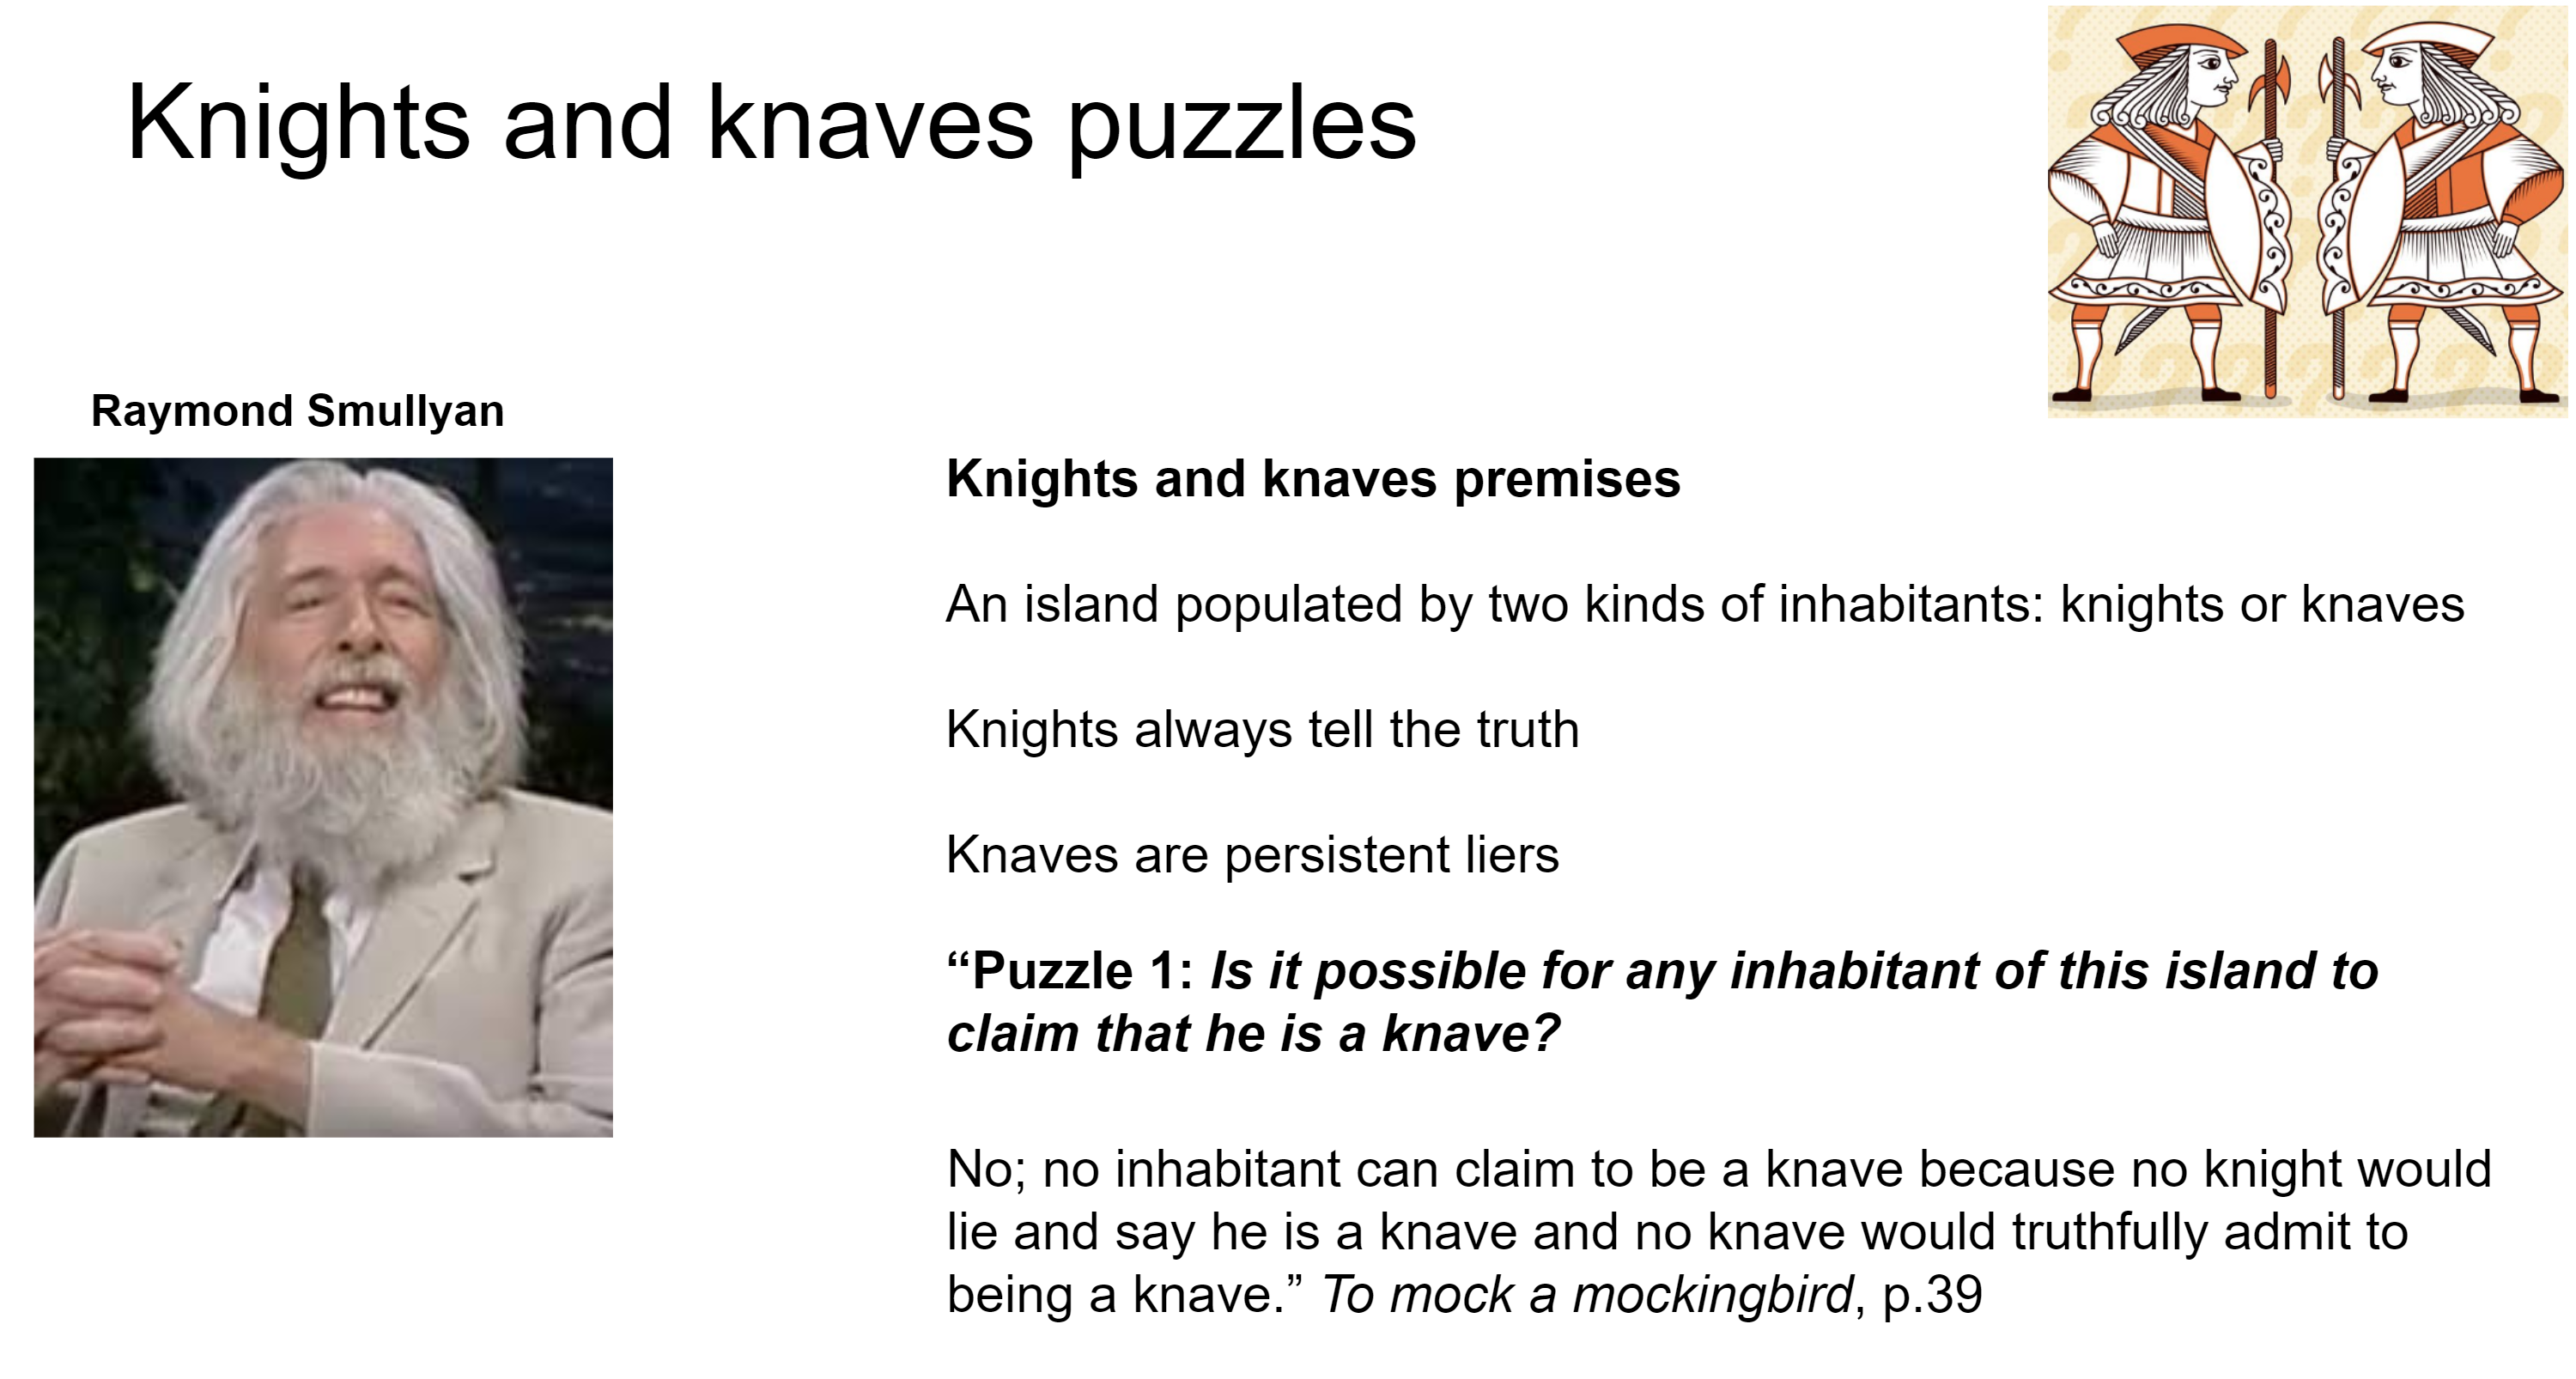

__P1:__ $\forall x. \mathrm{Knight}(x) \vee \mathrm{Knave}(x)$, where $\mathrm{Knave}(x) \equiv \neg \mathrm{Knight}(x)$

__P2:__ $\forall x. \mathrm{Knight}(x) \rightarrow \forall p. (\mathrm{Says}(x, p) \rightarrow p)$

__P3:__ $\forall x. \mathrm{Knave}(x) \rightarrow \forall p. (\mathrm{Says}(x, p) \rightarrow \neg p)$

__Puzzle:__ $\{\mathrm{P1},\;\mathrm{P2},\;\mathrm{P3}\} \vdash \forall x. \neg \mathrm{Says}(x, \mathrm{Knave}(x))$


$$ 
\begin{array}{clcll}
\mathrm{\bf Second-order\; logic} & & \mathrm{\bf Scala\; features} & & \\
\hline
p & & \mathtt{P[\_]} & & \mathrm{type\; constructor} \\
&&&&\\
\mathrm{\bf Propositions} && \mathrm{\bf Types}  && \\
\hline
p(q) &\;\;& P[Q] && \mathrm{type\;constructor\; application} \\ 
\forall q. p(q) && [Q] => () => P[Q] && \mathrm{polymorphic \;(function)\; value} \\
\end{array}
$$



In [ ]:
trait Inhabitant:
    type Knight
    type Knave = Not[Knight]
    type Says[_]

In [ ]:
trait KnightsAndKnaves:
    // ∀ x. Inhabitant(x) 🠂 Knight(x) ∨ Knave(x)
    val P1: (x: Inhabitant) => Either[x.Knight, x.Knave]
    
    // ∀ p. ∀ x. Knight(x) 🠂 Says(x, p) 🠂 p 
    val P2: [P] => (x: Inhabitant) => x.Knight => x.Says[P] => P

    // ∀ p. ∀ x. Knight(x) 🠂 Says(x, p) 🠂 p 
    val P3: [P] => (x: Inhabitant) => x.Knave => x.Says[P] => Not[P]

In [ ]:
def puzzle1(KK: KnightsAndKnaves): (x: Inhabitant) => Not[x.Says[x.Knave]] = 
    (x: Inhabitant) => (s: x.Says[x.Knave]) => 
        KK.P1(x) match {
            case Left(xIsKnight: x.Knight) => 
                KK.P2[x.Knave](x)(xIsKnight)(s)(xIsKnight) : Nothing
            case Right(xIsKnave) => 
                KK.P3[x.Knave](x)(xIsKnave)(s)(xIsKnave) : Nothing
        }

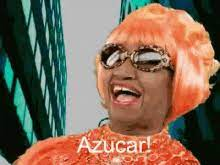

In [ ]:
object Sugar:

    implicit class NoOp[P](np: Not[P]):
        def contradicts(p: P): Nothing = np(p)

    def eitherKnightOrKnave[A](x: Inhabitant): KnightsAndKnaves ?=> (x.Knight ?=> A, x.Knave ?=> A) => A = 
        P ?=> (f, g) => P.P1(x).fold(a => f(using a), a => g(using a))

    def knightsAreTruthful[A](x: Inhabitant): KnightsAndKnaves ?=> x.Knight ?=> x.Says[A] => A = 
        P ?=> xIsKnight ?=> xSaysA => P.P2(x)(xIsKnight)(xSaysA)

    def knavesAreLiers[A](x: Inhabitant): KnightsAndKnaves ?=> x.Knave ?=> x.Says[A] => Not[A] = 
            P ?=> xIsKnave ?=> xSaysA => P.P3(x)(xIsKnave)(xSaysA)

In [ ]:
def puzzle1(KK: KnightsAndKnaves): (x: Inhabitant) => Not[x.Says[x.Knave]] = 
    // No; no inhabitant can claim to be a knave because no knight would lie and say he is a knave 
    // and no knave would truthfully admit to being a knave
    ???

In [ ]:
import Sugar._

def puzzle1(using KnightsAndKnaves): (x: Inhabitant) => Not[x.Says[x.Knave]] = 
    // No; no inhabitant can claim to be a knave because
    x => xSaysIsKnave => 
        eitherKnightOrKnave(x)(
            xIsKnight ?=> 
                // no knight would lie and say he is a knave
                knightsAreTruthful(x)(xSaysIsKnave) contradicts (xIsKnight),
            xIsKnave ?=> 
                // no knave would truthfully admit to being a knave
                knavesAreLiers(x)(xSaysIsKnave) contradicts (xIsKnave)
        )